# Signal processing course 2018/2019-1 @ ELTE
# Assignment 2 - Part 2
## 10.01.2018

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as random

In [148]:
sns.set()

## Task 4

## Task 5

## Task 6

### Amplitude- and phase spectral density

#### What is it, and why we use it?
According to Fourier analysis any physical signal can be decomposed into a number of discrete frequencies, or a spectrum of frequencies over a continuous range. The statistical average of a certain signal or sort of signal (including noise) as analyzed in terms of its frequency content, is called its spectrum. Any signal that can be represented as a variable that varies in time has a corresponding frequency spectrum.

When these signals are viewed in the form of a frequency spectrum, certain aspects of the received signals or the underlying processes producing them are revealed. In some cases the frequency spectrum may include a distinct peak corresponding to a sine wave component. And additionally there may be peaks corresponding to harmonics of a fundamental peak, indicating a periodic signal which is not simply sinusoidal. Or a continuous spectrum may show narrow frequency intervals which are strongly enhanced corresponding to resonances, or frequency intervals containing almost zero power as would be produced by a notch filter.[\[4\]](https://en.wikipedia.org/wiki/Spectral_density)

Sometimes one encounters an *amplitude spectral density* (ASD), which is the square root of the *power spectral density* (PSD), which is as follows:

$$
P_{PSD} = \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} \left| f(t) \right|^2 \ dt
$$

A PSD is the measure of signal's power content versus frequency. A PSD is typically used to characterize broadband random signals. The amplitude of the PSD is normalized by the spectral resolution employed to digitize the signal. 

#### Create some random $u$ discrete signal

In [181]:
def PositiveNegative():
    return 1 if random.random() < 0.5 else -1

In [185]:
def u_discrete_signal(t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = np.random.random() * PositiveNegative()
        i += 1
    
    return(signal)

#### Function 1

In [188]:
def f_1_spectrum(u,t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = (1/3) ** ((t/SampRate) * i) * u[i - 1]
        i += 1
    
    return(signal, time)

In [189]:
t_1_spectrum = 15
u_1_spectrum = u_discrete_signal(t_1_spectrum)

signal_spectrum_1, time_spectrum_1 = f_1_spectrum(u_1_spectrum, t_1_spectrum)

#### Plot random $u$ signal

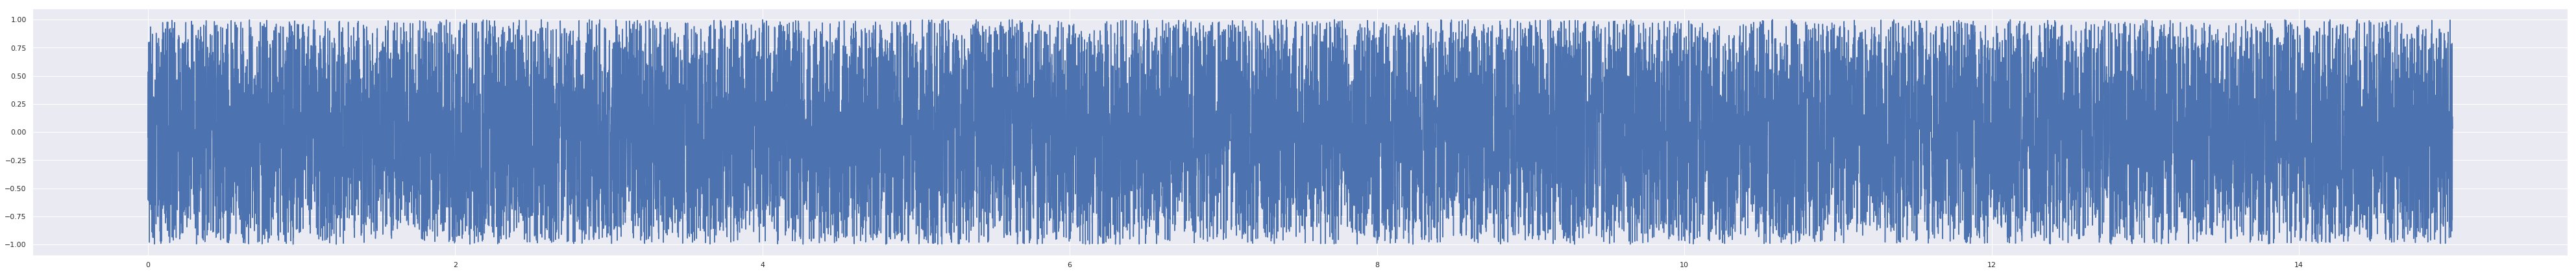

In [195]:
fig_u_1_spectrum = plt.figure(figsize=(70,7))

plt.plot(time_spectrum_1, u_1_spectrum)

plt.show()

##### Plot input signal

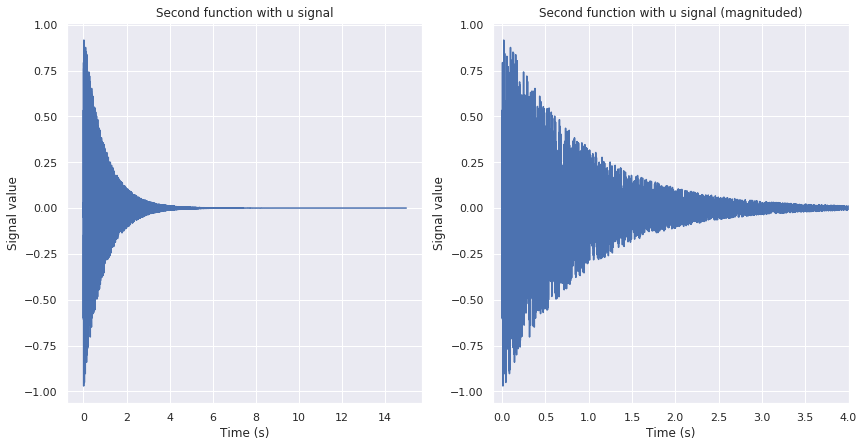

In [397]:
fig_f_1_spectrum, axes_f_1_spectrum = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

axes_f_1_spectrum[0].plot(time_spectrum_1, signal_spectrum_1)
axes_f_1_spectrum[0].set_title("Second function with u signal")
axes_f_1_spectrum[0].set_xlabel("Time (s)")
axes_f_1_spectrum[0].set_ylabel("Signal value")

axes_f_1_spectrum[1].plot(time_spectrum_1, signal_spectrum_1)
axes_f_1_spectrum[1].set_title("Second function with u signal (magnituded)")
axes_f_1_spectrum[1].set_xlabel("Time (s)")
axes_f_1_spectrum[1].set_ylabel("Signal value")
axes_f_1_spectrum[1].set_xlim(-0.1,4)

plt.show()

##### Power density spectrum and Amplitude density spectrum

In [357]:
power_spectrum_1 = np.abs(np.fft.rfft(signal_spectrum_1))**2

In [358]:
freqs_1 = np.abs(np.fft.fftfreq(power_spectrum_1.size, 1/(time_spectrum_1.size/t_1_spectrum)))
idx_1 = np.argsort(freqs_1)

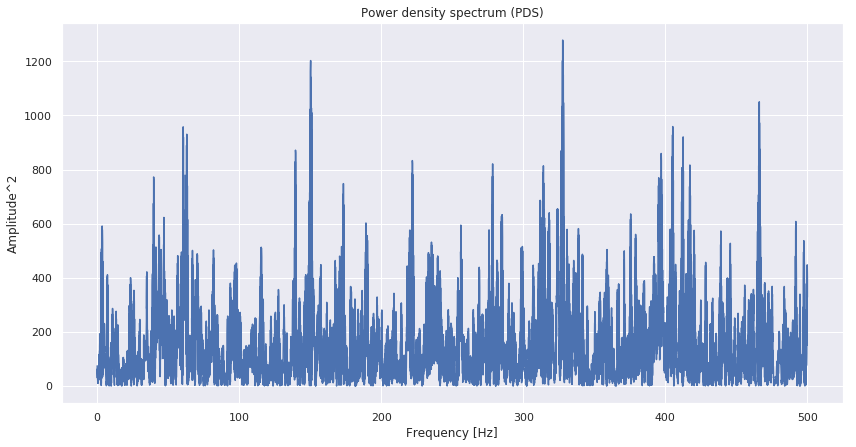

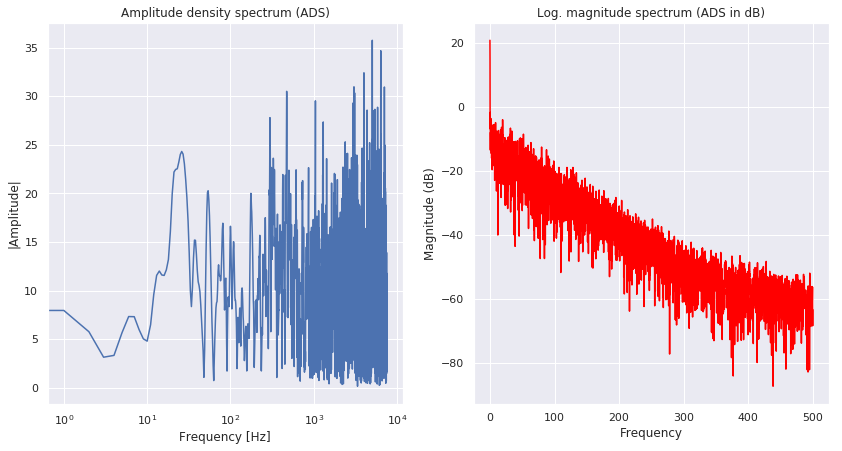

In [396]:
# Fig 1
fig_f_1_PowS, axes_f_1_PowS = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

axes_f_1_PowS.plot = plt.plot(freqs_1[idx_1], power_spectrum_1[idx_1])
axes_f_1_PowS.set_title("Power density spectrum (PDS)")
axes_f_1_PowS.set_xlabel("Frequency [Hz]")
axes_f_1_PowS.set_ylabel("Amplitude^2")

# Fig 2
fig_f_1_AS, axes_f_1_AS = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

axes_f_1_AS[0].plot(np.sqrt(power_spectrum_1))
axes_f_1_AS[0].set_title("Amplitude density spectrum (ADS)")
axes_f_1_AS[0].set_xlabel("Frequency [Hz]")
axes_f_1_AS[0].set_ylabel("|Amplitude|")
axes_f_1_AS[0].set_xscale("log")

axes_f_1_AS[1].magnitude_spectrum(np.sqrt(power_spectrum_1), Fs=1000, scale="dB", color="red")
axes_f_1_AS[1].set_title("Log. magnitude spectrum (ADS in dB)")

plt.show()

##### Phase spectrum

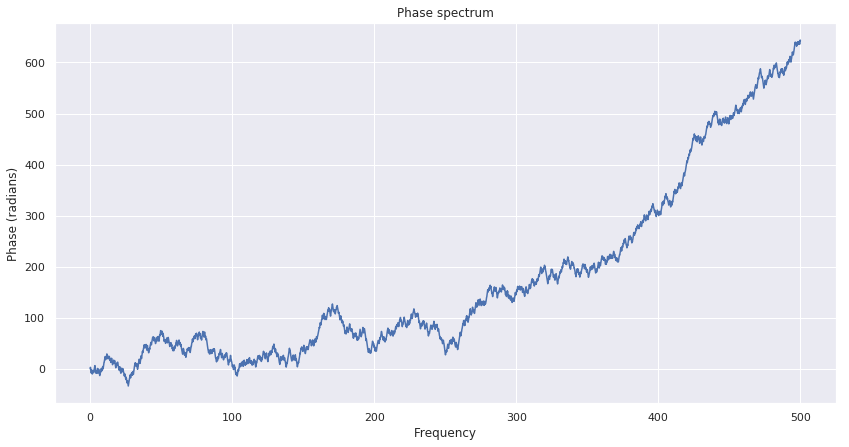

In [395]:
fig_f_1_PS, axes_f_1_PS = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

axes_f_1_PS.phase_spectrum(np.sqrt(power_spectrum_1), Fs=1000)
axes_f_1_PS.set_title("Phase spectrum")

plt.show()

#### Function 2

In [214]:
def f_2_spectrum(u,t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = (1/4) ** ((t/SampRate) * i) * np.cos(np.pi * ((t/SampRate) * i) / 4) * u[i - 2]
        i += 1
    
    return(signal, time)

In [215]:
t_2_spectrum = 15
u_2_spectrum = u_discrete_signal(t_2_spectrum)

signal_spectrum_2, time_spectrum_2 = f_2_spectrum(u_2_spectrum, t_2_spectrum)

#### Plot random $u$ signal

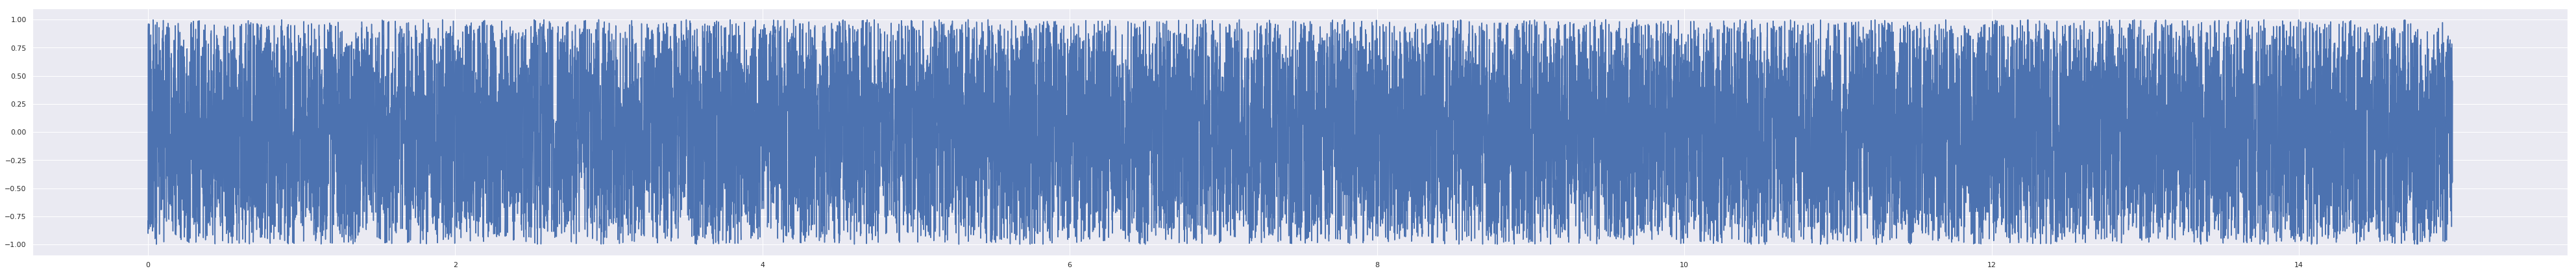

In [216]:
fig_u_2_spectrum = plt.figure(figsize=(70,7))

plt.plot(time_spectrum_2, u_2_spectrum)

plt.show()

##### Plot input signal

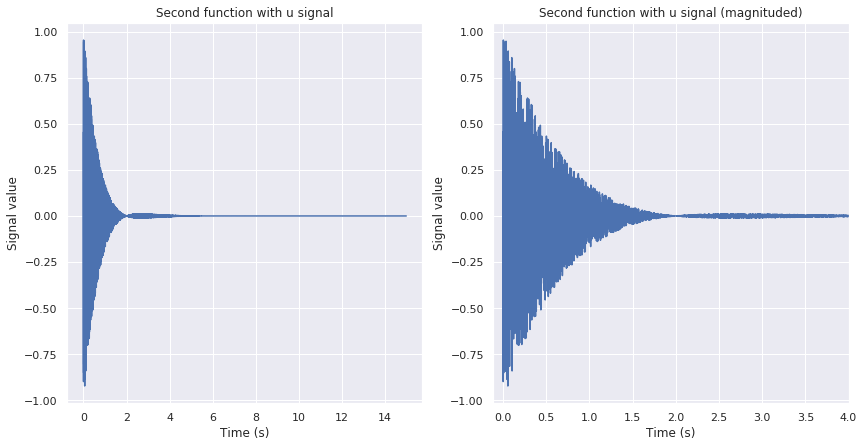

In [398]:
fig_f_2_spectrum, axes_f_2_spectrum = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

axes_f_2_spectrum[0].plot(time_spectrum_2, signal_spectrum_2)
axes_f_2_spectrum[0].set_title("Second function with u signal")
axes_f_2_spectrum[0].set_xlabel("Time (s)")
axes_f_2_spectrum[0].set_ylabel("Signal value")

axes_f_2_spectrum[1].plot(time_spectrum_2, signal_spectrum_2)
axes_f_2_spectrum[1].set_title("Second function with u signal (magnituded)")
axes_f_2_spectrum[1].set_xlabel("Time (s)")
axes_f_2_spectrum[1].set_ylabel("Signal value")
axes_f_2_spectrum[1].set_xlim(-0.11,4)

plt.show()

##### Power density spectrum and Amplitude density spectrum

In [361]:
power_spectrum_2 = np.abs(np.fft.rfft(signal_spectrum_2))**2

In [362]:
freqs_2 = np.abs(np.fft.fftfreq(power_spectrum_2.size, 1/(time_spectrum_2.size/t_2_spectrum)))
idx_2 = np.argsort(freqs_2)

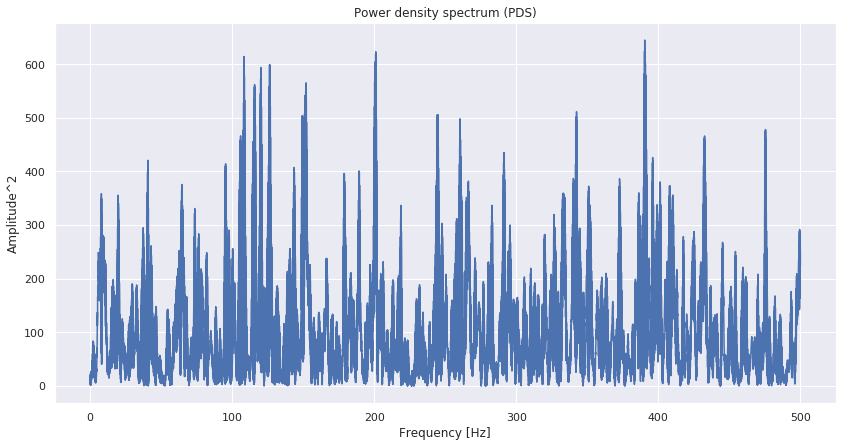

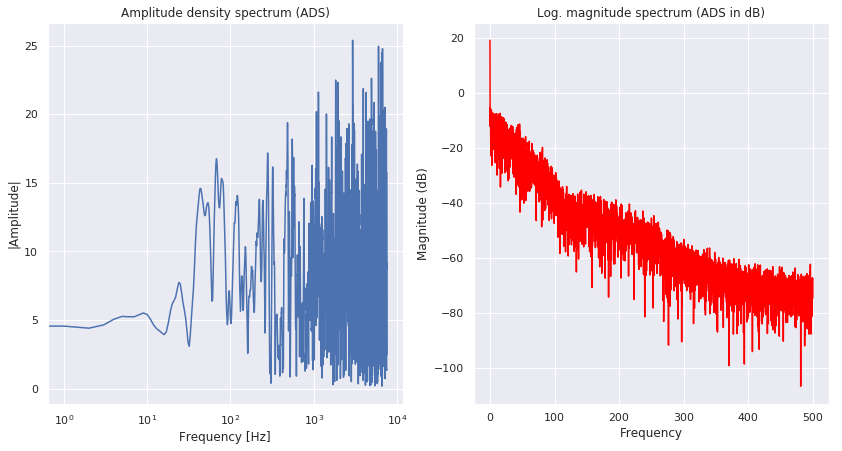

In [393]:
# Fig 1
fig_f_2_PowS, axes_f_2_PowS = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

axes_f_2_PowS.plot = plt.plot(freqs_2[idx_2], power_spectrum_2[idx_2])
axes_f_2_PowS.set_title("Power density spectrum (PDS)")
axes_f_2_PowS.set_xlabel("Frequency [Hz]")
axes_f_2_PowS.set_ylabel("Amplitude^2")

# Fig 2
fig_f_2_AS, axes_f_2_AS = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

axes_f_2_AS[0].plot(np.sqrt(power_spectrum_2))
axes_f_2_AS[0].set_title("Amplitude density spectrum (ADS)")
axes_f_2_AS[0].set_xlabel("Frequency [Hz]")
axes_f_2_AS[0].set_ylabel("|Amplitude|")
axes_f_2_AS[0].set_xscale("log")

axes_f_2_AS[1].magnitude_spectrum(np.sqrt(power_spectrum_2), Fs=1000, scale="dB", color="red")
axes_f_2_AS[1].set_title("Log. magnitude spectrum (ADS in dB)")

plt.show()

##### Phase spectrum

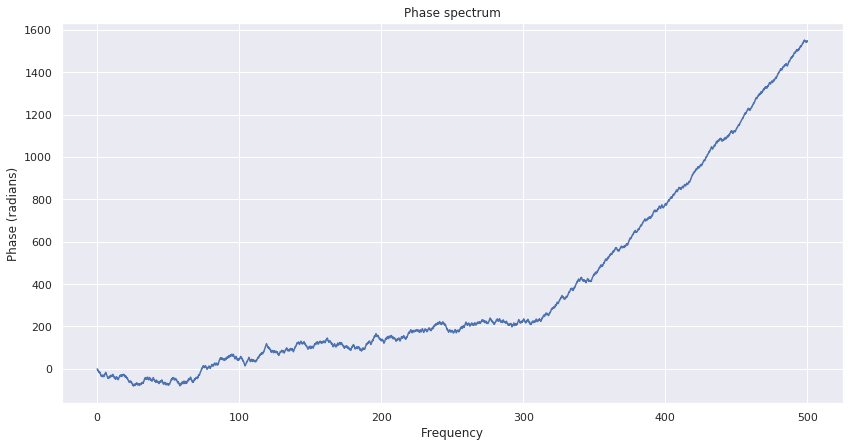

In [394]:
fig_f_2_PS, axes_f_2_PS = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

axes_f_2_PS.phase_spectrum(np.sqrt(power_spectrum_2), Fs=1000)
axes_f_2_PS.set_title("Phase spectrum")

plt.show()

#### Function 3

In [223]:
def f_3_spectrum(t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = np.sinc(2 * np.pi * ((t/SampRate) * i) / 8) * np.sinc(2 * np.pi * (((t/SampRate) * i) - 4) / 8)
        i += 1
    
    return(signal, time)

In [224]:
t_3_spectrum = 15

signal_spectrum_3, time_spectrum_3 = f_3_spectrum(t_3_spectrum)

##### Plot input signal

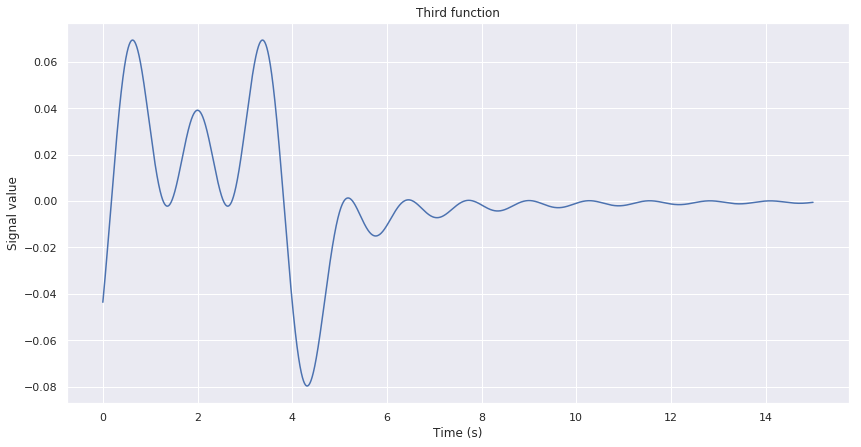

In [391]:
fig_f_3_spectrum = plt.figure(figsize=(14,7))

plt.plot(time_spectrum_3, signal_spectrum_3)

plt.title("Third function")
plt.xlabel("Time (s)")
plt.ylabel("Signal value")

plt.show()

##### Power density spectrum and Amplitude density spectrum

In [365]:
power_spectrum_3 = np.abs(np.fft.rfft(signal_spectrum_3))**2

In [366]:
freqs_3 = np.abs(np.fft.fftfreq(power_spectrum_3.size, 1/(time_spectrum_3.size/t_3_spectrum)))
idx_3 = np.argsort(freqs_3)

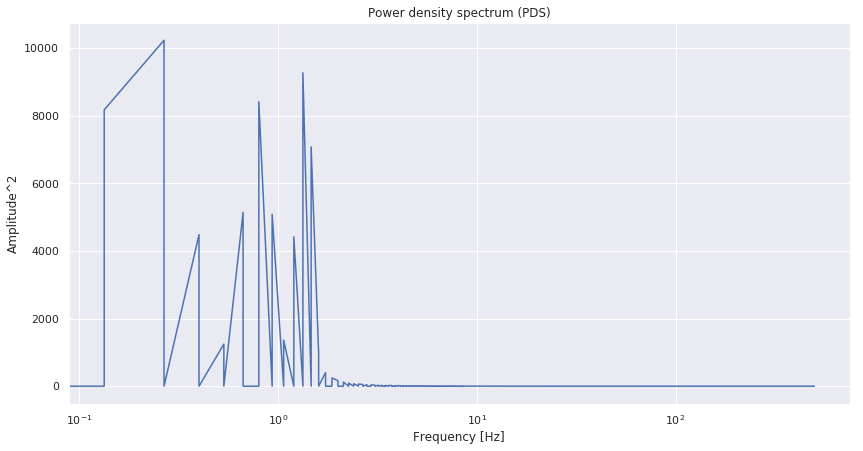

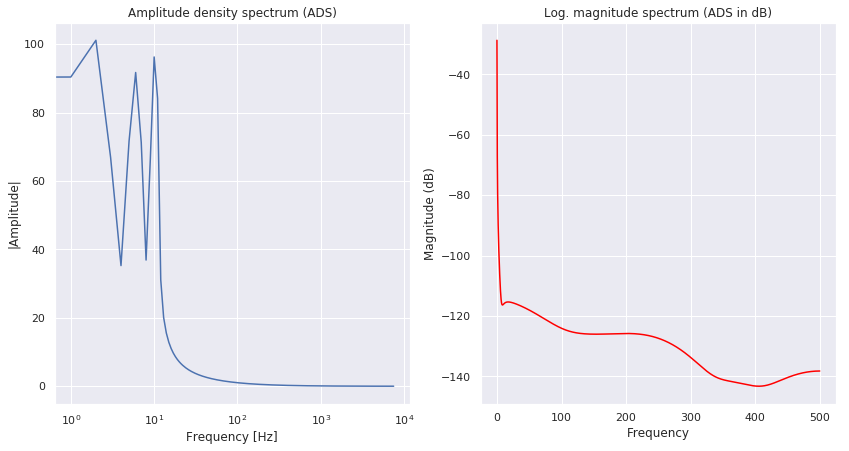

In [390]:
# Fig 1
fig_f_3_PowS, axes_f_3_PowS = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

axes_f_3_PowS.plot = plt.plot(freqs_3[idx_3], power_spectrum_3[idx_3])
axes_f_3_PowS.set_title("Power density spectrum (PDS)")
axes_f_3_PowS.set_xlabel("Frequency [Hz]")
axes_f_3_PowS.set_ylabel("Amplitude^2")
axes_f_3_PowS.set_xscale("log")

# Fig 2
fig_f_3_AS, axes_f_3_AS = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

axes_f_3_AS[0].plot(np.sqrt(power_spectrum_3))
axes_f_3_AS[0].set_title("Amplitude density spectrum (ADS)")
axes_f_3_AS[0].set_xlabel("Frequency [Hz]")
axes_f_3_AS[0].set_ylabel("|Amplitude|")
axes_f_3_AS[0].set_xscale("log")

axes_f_3_AS[1].magnitude_spectrum(np.sqrt(power_spectrum_3), Fs=1000, scale="dB", color="red")
axes_f_3_AS[1].set_title("Log. magnitude spectrum (ADS in dB)")

plt.show()

##### Phase spectrum

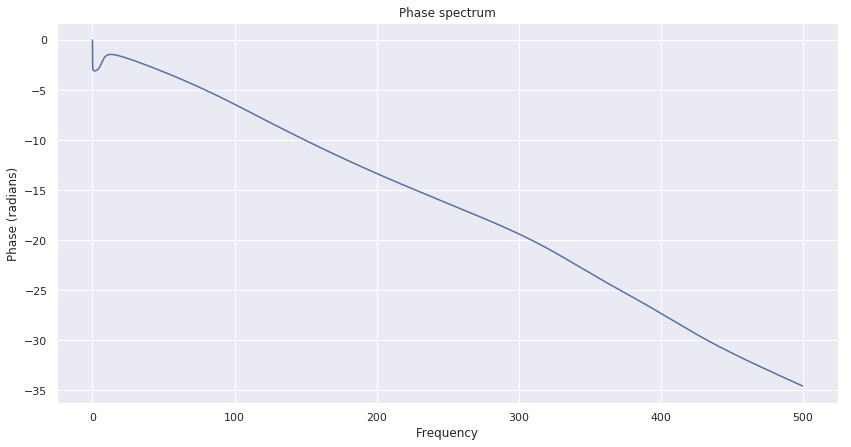

In [392]:
fig_f_3_PS, axes_f_3_PS = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

axes_f_3_PS.phase_spectrum(np.sqrt(power_spectrum_3), Fs=1000)
axes_f_3_PS.set_title("Phase spectrum")

plt.show()

#### Function 4

In [232]:
def f_4_spectrum(u,t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = np.sin(np.pi * ((t/SampRate) * i) / 10) * (u[i] - u[i - 10]) 
        i += 1
    
    return(signal, time)

In [244]:
t_4_spectrum = 150
u_4_spectrum = u_discrete_signal(t_4_spectrum)

signal_spectrum_4, time_spectrum_4 = f_4_spectrum(u_4_spectrum, t_4_spectrum)

#### Plot random $u$ signal

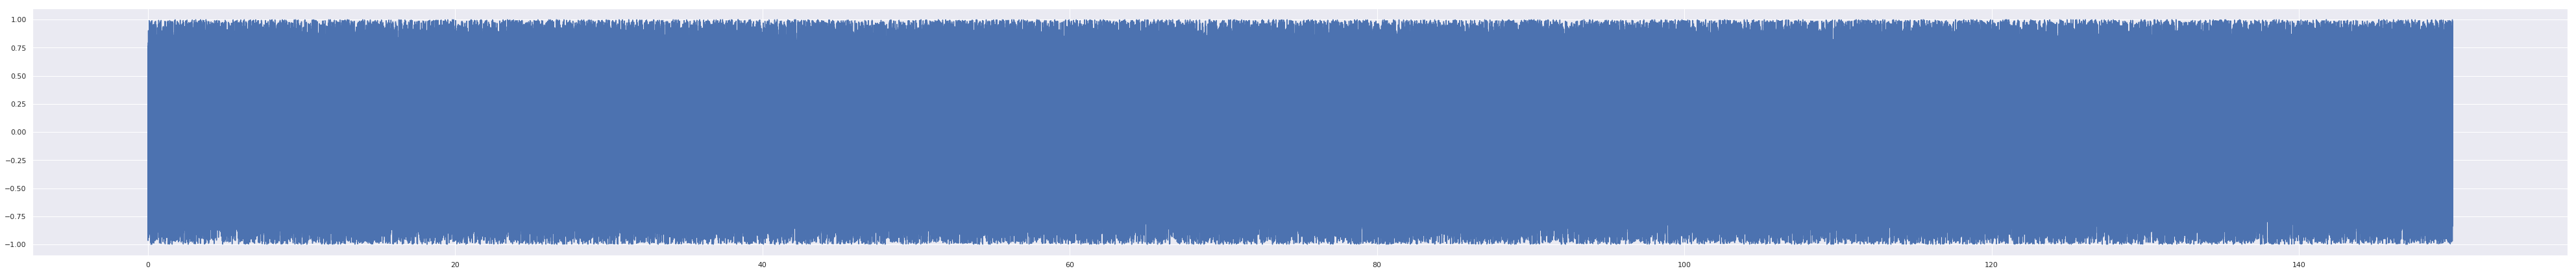

In [245]:
fig_u_4_spectrum = plt.figure(figsize=(70,7))

plt.plot(time_spectrum_4, u_4_spectrum)

plt.show()

##### Plot input signal

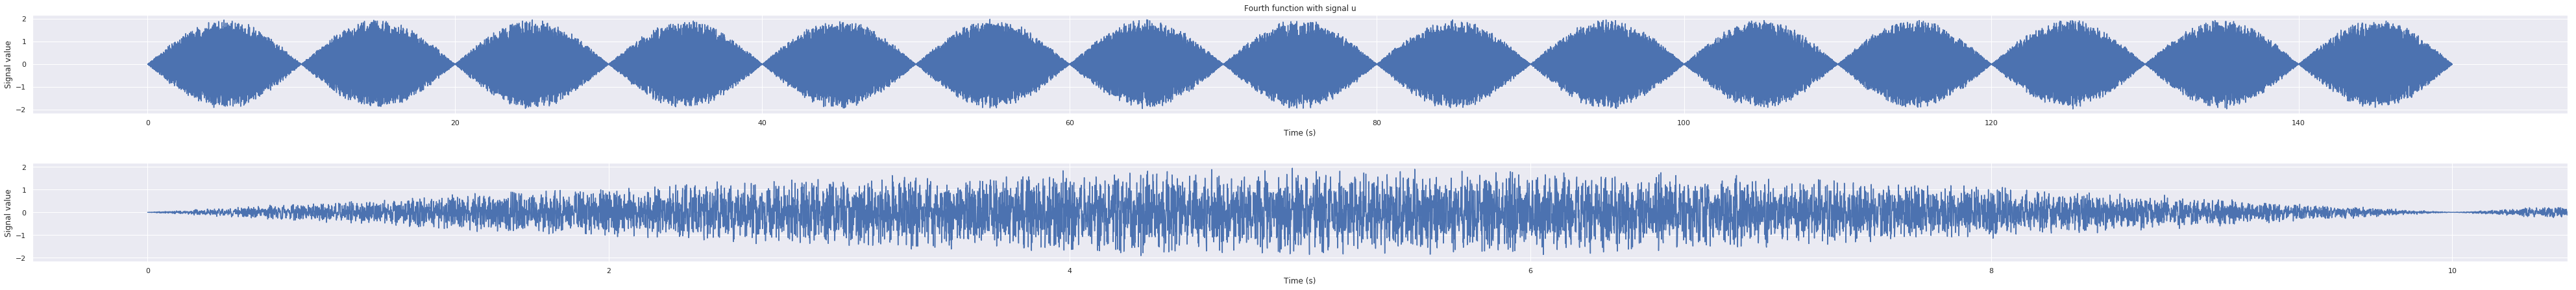

In [266]:
fig_f_4_spectrum, axes_f_4_spectrum = plt.subplots(nrows=2, ncols=1, figsize=(70,7))

axes_f_4_spectrum[0].plot(time_spectrum_4, signal_spectrum_4)
axes_f_4_spectrum[0].set_title("Fourth function with signal u")
axes_f_4_spectrum[0].set_xlabel("Time (s)")
axes_f_4_spectrum[0].set_ylabel("Signal value")

axes_f_4_spectrum[1].plot(time_spectrum_4, signal_spectrum_4)
axes_f_4_spectrum[1].set_xlabel("Time (s)")
axes_f_4_spectrum[1].set_ylabel("Signal value")
axes_f_4_spectrum[1].set_xlim(-0.5, 10.5)

plt.subplots_adjust(hspace = 0.5)

plt.show()

##### Power density spectrum and Amplitude density spectrum

In [369]:
power_spectrum_4 = np.abs(np.fft.rfft(signal_spectrum_4))**2

In [370]:
freqs_4 = np.abs(np.fft.fftfreq(power_spectrum_4.size, 1/(time_spectrum_4.size/t_4_spectrum)))
idx_4 = np.argsort(freqs_4)

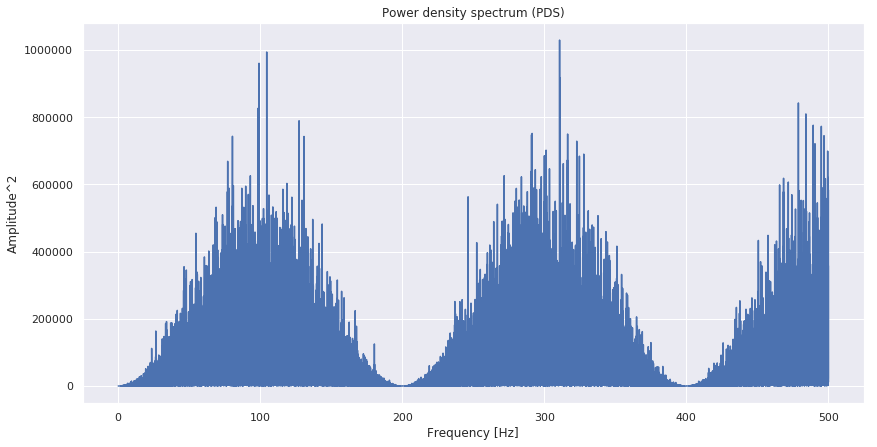

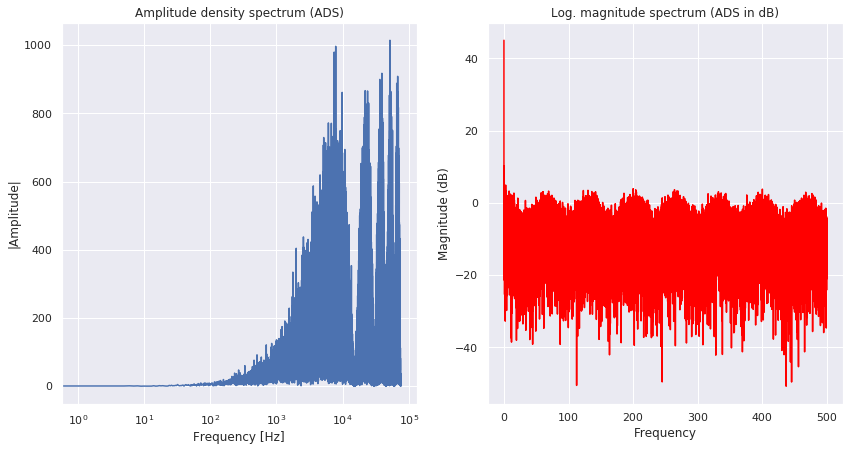

In [371]:
# Fig 1
fig_f_4_PowS, axes_f_4_PowS = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

axes_f_4_PowS.plot = plt.plot(freqs_4[idx_4], power_spectrum_4[idx_4])
axes_f_4_PowS.set_title("Power density spectrum (PDS)")
axes_f_4_PowS.set_xlabel("Frequency [Hz]")
axes_f_4_PowS.set_ylabel("Amplitude^2")

# Fig 2
fig_f_4_AS, axes_f_4_AS = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

axes_f_4_AS[0].plot(np.sqrt(power_spectrum_4))
axes_f_4_AS[0].set_title("Amplitude density spectrum (ADS)")
axes_f_4_AS[0].set_xlabel("Frequency [Hz]")
axes_f_4_AS[0].set_ylabel("|Amplitude|")
axes_f_4_AS[0].set_xscale("log")

axes_f_4_AS[1].magnitude_spectrum(np.sqrt(power_spectrum_4), Fs=1000, scale="dB", color="red")
axes_f_4_AS[1].set_title("Log. magnitude spectrum (ADS in dB)")

plt.show()

##### Phase spectrum

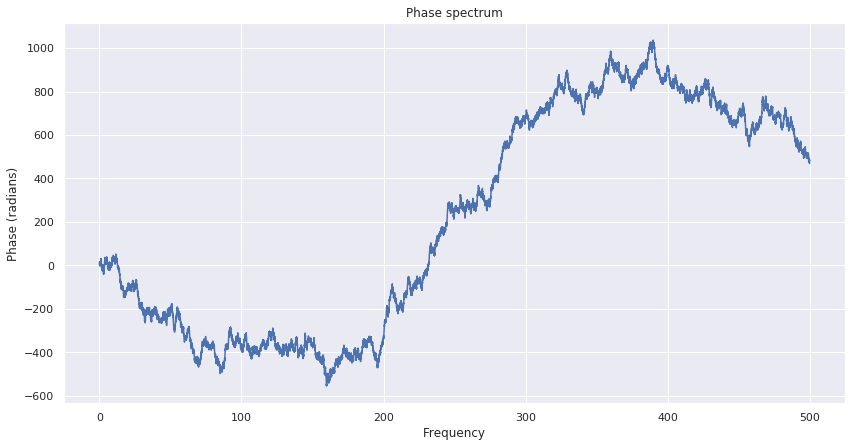

In [399]:
fig_f_4_PS, axes_f_4_PS = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

axes_f_4_PS.phase_spectrum(np.sqrt(power_spectrum_4), Fs=1000)
axes_f_4_PS.set_title("Phase spectrum")

plt.show()

#### Function 5

In [262]:
def f_5_spectrum(t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = (np.sinc(np.pi * ((t/SampRate) * i) / 4)) ** 2 
        i += 1
    
    return(signal, time)

In [264]:
t_5_spectrum = 15

signal_spectrum_5, time_spectrum_5 = f_5_spectrum(t_5_spectrum)

##### Plot input signal

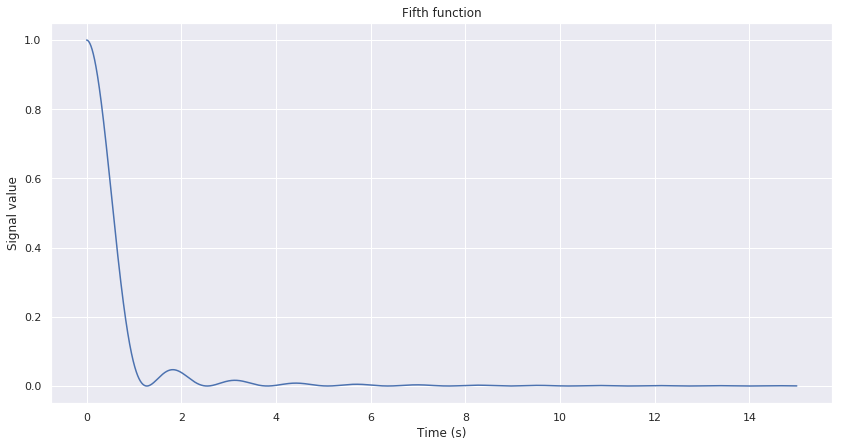

In [271]:
fig_f_5_spectrum = plt.figure(figsize=(14,7))

plt.plot(time_spectrum_5, signal_spectrum_5)

plt.title("Fifth function")
plt.xlabel("Time (s)")
plt.ylabel("Signal value")

plt.show()

##### Power density spectrum and Amplitude density spectrum

In [373]:
power_spectrum_5 = np.abs(np.fft.rfft(signal_spectrum_5))**2

In [374]:
freqs_5 = np.abs(np.fft.fftfreq(power_spectrum_5.size, 1/(time_spectrum_5.size/t_5_spectrum)))
idx_5 = np.argsort(freqs_5)

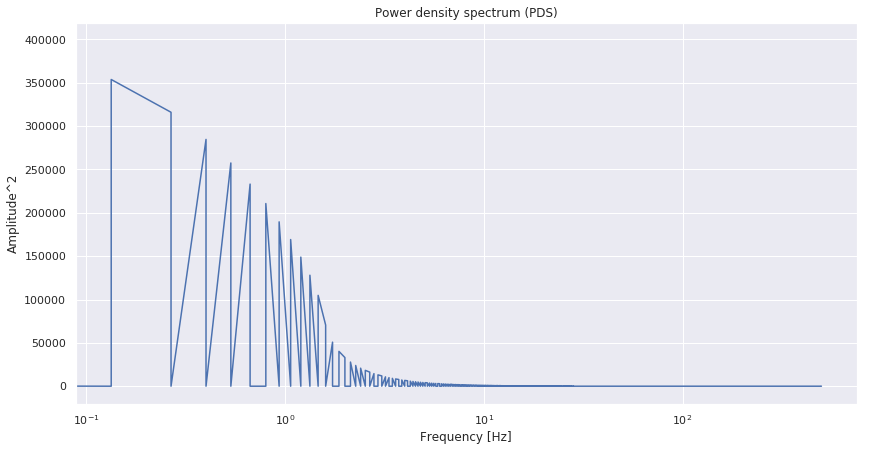

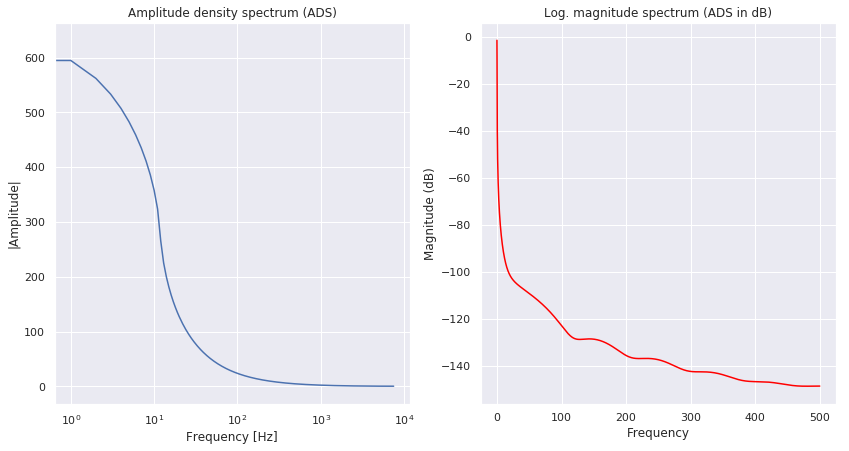

In [375]:
# Fig 1
fig_f_5_PowS, axes_f_5_PowS = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

axes_f_5_PowS.plot = plt.plot(freqs_5[idx_5], power_spectrum_5[idx_5])
axes_f_5_PowS.set_title("Power density spectrum (PDS)")
axes_f_5_PowS.set_xlabel("Frequency [Hz]")
axes_f_5_PowS.set_ylabel("Amplitude^2")
axes_f_5_PowS.set_xscale("log")

# Fig 2
fig_f_5_AS, axes_f_5_AS = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

axes_f_5_AS[0].plot(np.sqrt(power_spectrum_5))
axes_f_5_AS[0].set_title("Amplitude density spectrum (ADS)")
axes_f_5_AS[0].set_xlabel("Frequency [Hz]")
axes_f_5_AS[0].set_ylabel("|Amplitude|")
axes_f_5_AS[0].set_xscale("log")

axes_f_5_AS[1].magnitude_spectrum(np.sqrt(power_spectrum_5), Fs=1000, scale="dB", color="red")
axes_f_5_AS[1].set_title("Log. magnitude spectrum (ADS in dB)")

plt.show()

##### Phase spectrum

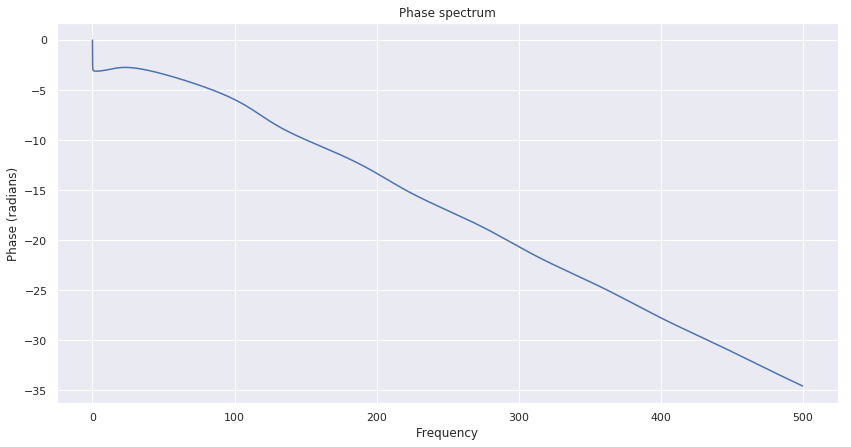

In [400]:
fig_f_5_PS, axes_f_5_PS = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

axes_f_5_PS.phase_spectrum(np.sqrt(power_spectrum_5), Fs=1000)
axes_f_5_PS.set_title("Phase spectrum")

plt.show()

## Task 7 - Theoretical summary

### Fourier transform

#### Definition of Fourier transform [\[4\]](https://en.wikipedia.org/wiki/Fourier_transform)

The Fourier transform of the function $f$ is traditionally denoted by adding a circumflex: $\hat{f}$, or using the $\mathcal{F}$ symbol. There are several common conventions for defining the Fourier transform of an integrable function $f:\mathbb{R} \to \mathbb{C}$:

$$
\hat{f}(\xi) = \underbrace{\int_{-\infty}^{\infty} f(x) e^{-2 \pi i x \xi}\ dx}_{\text{A version}}
\equiv
\underbrace{\int_{-\infty}^{\infty} f(x) e^{-i x \xi}\ dx}_{\text{B version}}
$$

When the independent variable $x$ represents time (noted by $t$), the transform variable $\xi$ represents frequency (noted by $\omega$) E.g. if time is measured in $s$, then the frequency is in $1/s$. Under suitable conditions, $f$ is determined by $\hat{f}$ via the inverse transform:

$$
f(x) = \underbrace{\int_{-\infty}^{\infty} \hat{f}(\xi) e^{2\pi i x \xi}\ d\xi}_{\text{A version inverse}}
\equiv
\underbrace{\frac{1}{2 \pi} \int_{-\infty}^{\infty} \hat{f}(\xi) e^{i x \xi}\ d\xi}_{\text{B version inverse}}
$$

for any real number $x$. On the left side of the $\equiv$ symbols, the $2 \pi$ is already included in the definition, however on the right side, it isn't. Therefore we need to divide with it at the inverse case.

Here we will use the *A version*.

#### Convolution [\[5\]](http://web.stanford.edu/class/ee102/lectures/samp_mod.pdf)

Suppose $f(x)$, $g(x)$ have the Fourier transform $\hat{f}(\xi)$, $\hat{g}(\xi)$, the *convolution* $y = f * g$ of $f$ and $g$ is given by

$$
y(t) = \int_{-\infty}^{\infty} f(\tau) g(x - \tau)\ d\tau
$$

Therefore

$$
\hat{y}(\xi) = \hat{f}(\xi)\hat{g}(\xi) 
$$

(E.g. convolution in the time domain corresponds to multiplication in the frequency domain.)

#### Dirac-$\delta$ distribution [\[6\]](https://en.wikipedia.org/wiki/Dirac_delta_function)

Joseph Fourier presented what is now called the Fourier integral theorem in his treatise *Théorie analytique de la chaleur* in the form:

$$
f(x) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} d\alpha \cdot \left( f(\alpha) \ \int_{-\infty}^{\infty} dp \cos \left( px - p \alpha \right) \right)
$$

which is tantamount to the introduction of the $\delta$-function in the form:

$$
\delta(x - \alpha) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} dp \cos \left( px-p \alpha \right)
$$

Later, Augustin Cauchy expressed the theorem using exponentials:

$$
f(x) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{ipx}\left(\int_{-\infty}^{\infty} e^{-ip \alpha} \ f(\alpha) \ d\alpha \right) dp
$$


$$
f(x) = \int_{-\infty}^{\infty} \delta (x - \alpha) \ f(\alpha) \ d\alpha
$$

the $\delta$-function is expressed as

$$
\delta(x - \alpha) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{ip(x - \alpha)} dp 
$$

***

### Symmetry properties of Fourier transform [\[7\]](http://fourier.eng.hmc.edu/e101/lectures/handout3/node2.html)

#### 1) Translation/Time shifting

For any real number $x_{0}$, if

$$
h(x) = f(x − x_{0})
$$

then

$$
\hat{h}(\xi) = e^{−2\pi x_{0} \xi} \hat{f}(\xi)
$$

#### 2) Frequency shifting/Frequency modulation

For any real number $\xi_{0}$, if 

$$
h(x) = e^{2 \pi ix \xi_{0}} f(x)
$$

then

$$
\hat{h}(\xi) = \hat{f}(\xi − \xi_{0})
$$

#### 3) Time reversal

If

$$
h(x) = f(−x)
$$

then

$$
\mathcal{F} \left[ {h}(-x) \right] = \hat{h}(-\xi)
$$

#### 4) Conjugation

If $h(x) = \overline{f(x)}$, then

$$
\hat{h}(\xi) = \overline{\hat{f}(-\xi)}
$$

In particular, if $f$ is real, then one has the reality condition

$$
\hat{f}(-\xi) = \overline {\hat{f}(\xi)}
$$

that is, $\hat{f}$ is a Hermitian function. And if $f$ is purely imaginary, then

$$
\hat{f}(-\xi)  = -\overline{\hat {f}(\xi)}
$$

#### 5) Differentiation

Suppose $f(x)$ is a differentiable function, and both $f$ and its derivative $f′$ are integrable. Then the Fourier transform of the derivative is given by

$$
\widehat{f'}(\xi) = 2 \pi i \xi \hat{f}(\xi)
$$

More generally, the Fourier transformation of the $n$th derivative $f^{(n)}$ is given by

$$
\widehat{f^{(n)}}(\xi)= (2 \pi i \xi)^{n} \hat{f}(\xi)
$$

## Task 7 - Solving the assignments

#### Function 1

$$
X \left( e^{j \omega} \right) = \delta \left( \omega \right) - \delta \left( \omega - \frac{\pi}{2} \right) - \delta \left( \omega + \frac{\pi}{2} \right)
$$